In [41]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

Импорт всего нужного, далее загружаю датасет

In [42]:
df = pd.read_csv('/Users/anastasiafedoracenko/Desktop/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [44]:
df.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


Вижу, что кол-во записей по классам равное, только отсутствует один класс - 4

In [45]:
x = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y = df['Type']

Разделила данные на тест и обучение, далее будет функция, которая обучит модель, предскажет целевое значение и выведет точность предсказания accuracy.   

In [76]:
def learn_model(x, y, model = None):
    if model is None:
        model = RandomForestClassifier()
        
    x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 7, test_size = 0.2)
    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    
    print(f'Точность предсказания {model}: {score}')
    print(f'Предказаннные типы стекла: {y_pred}')
    
    return model, y_pred , score 

In [77]:
model, y_pred, score = learn_model(x = x, y = y)

Точность предсказания RandomForestClassifier(): 0.6976744186046512
Предказаннные типы стекла: [2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 5 2 6 2 5 2 7 2 6 7 1 1 2 7 1 1 2 2 7 3
 1 2 1 2 7 7]


На этих данных точность = 0.69, не плохо. Далее изучу данные, найду выбросы, удалю самые явные и применю функцию к новым даным.

In [78]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

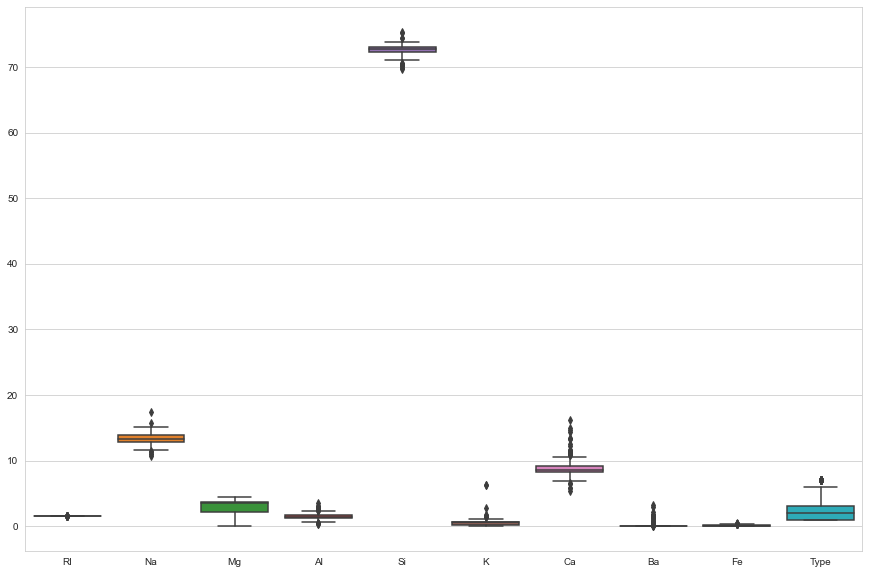

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,10))
sns.boxplot(data = df)

На этой визуаилизации видно, что нормальное распределение только у показателя Mg, но я бы проверила еще все по отдельности, ля лучшей наглядности. 

<AxesSubplot:>

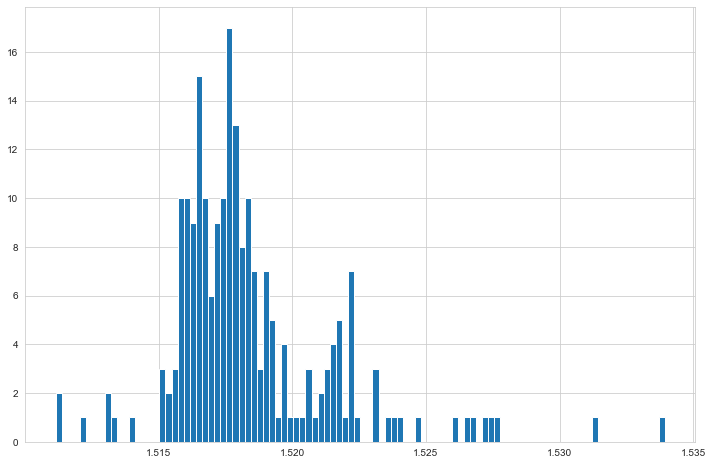

In [80]:
df['RI'].hist(bins = 100, figsize = (12, 8))


<AxesSubplot:>

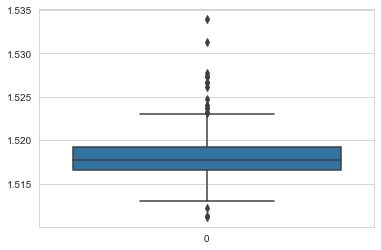

In [81]:
sns.boxplot(data = df['RI'])

Тут явные выбросы до 1.514  и от 1.525, буду чистить. 

<AxesSubplot:>

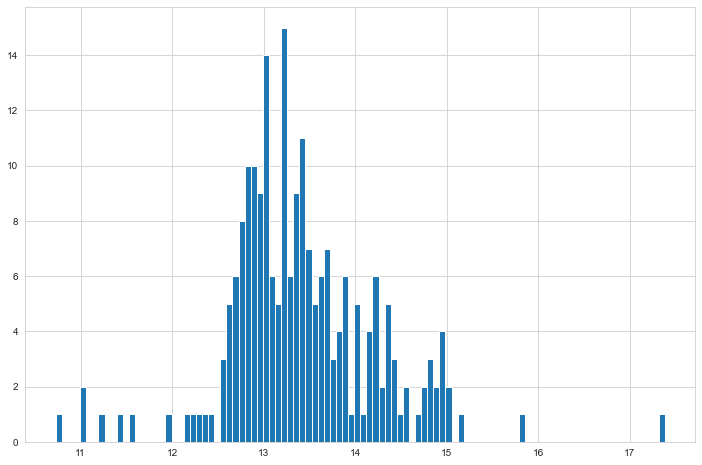

In [105]:
df['Na'].hist(bins = 100, figsize = (12, 8))

<AxesSubplot:>

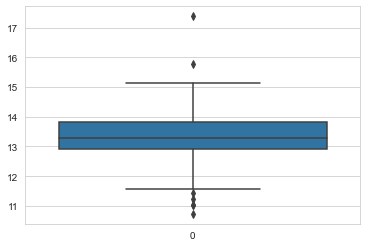

In [106]:
sns.boxplot(data = df['Na'])

Тут тоже вижу явные выбросы до 12 и после 15.

<AxesSubplot:>

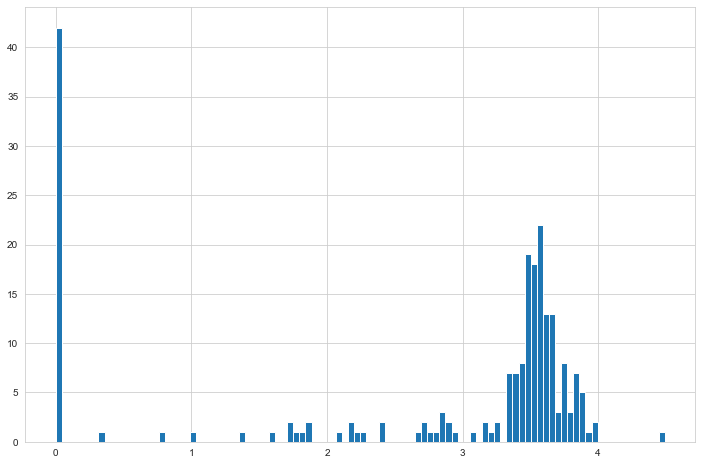

In [107]:
df['Mg'].hist(bins = 100, figsize = (12, 8))

<AxesSubplot:>

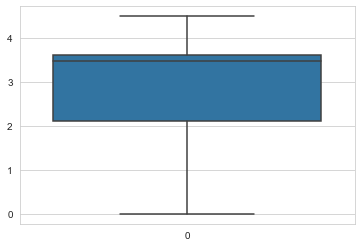

In [85]:
sns.boxplot(data = df['Mg'])

Вот этот показатель на боксплоте выглядит будто без выбросов, но на гситограмме все очень не однозначно, не уверена, надо ли удалять, потому что тут нет какой-то точности, есть только скопление данных в признаке при показателях от ~ 3.2 и до 4 и большое кол-во с одним показателем в 0. Наверно оставлю как есть.

<AxesSubplot:>

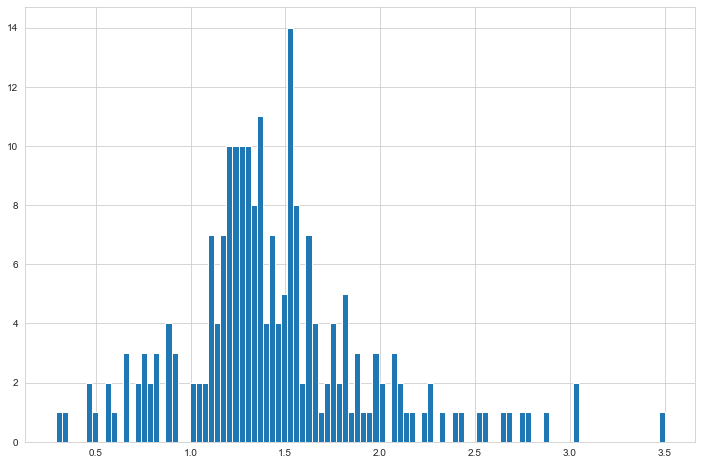

In [86]:
df['Al'].hist(bins = 100, figsize = (12, 8))

<AxesSubplot:>

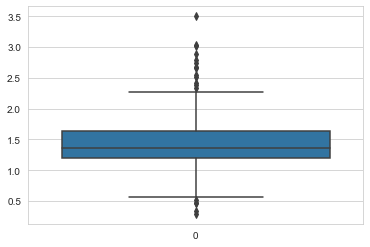

In [87]:
sns.boxplot(data = df['Al'])

Опять же, тут выбросы буду удалять до 0.5 и после 3,0

<AxesSubplot:>

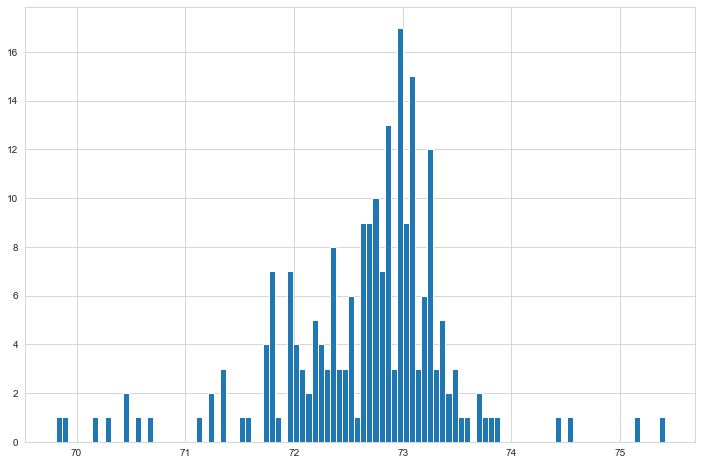

In [88]:
df['Si'].hist(bins = 100, figsize = (12, 8))


<AxesSubplot:>

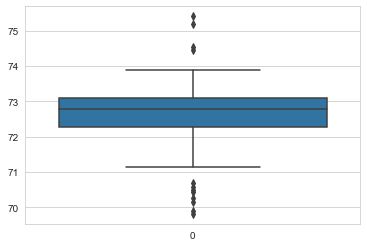

In [89]:
sns.boxplot(data = df['Si'])

В этом признаке удалю выбросы до 71 и после 74 

<AxesSubplot:>

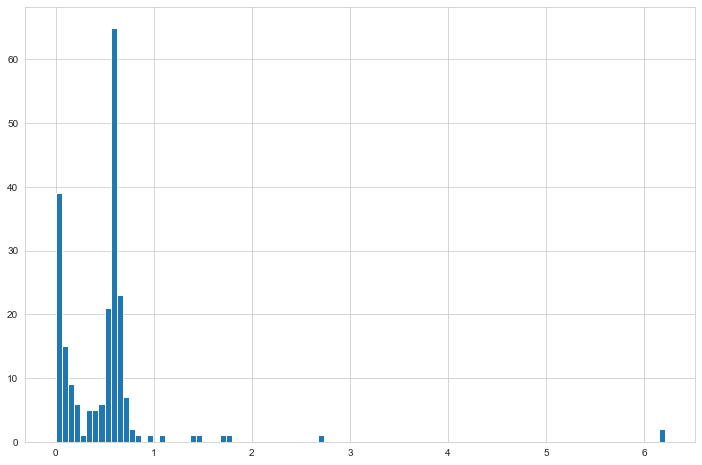

In [90]:
df['K'].hist(bins = 100, figsize = (12, 8))


<AxesSubplot:>

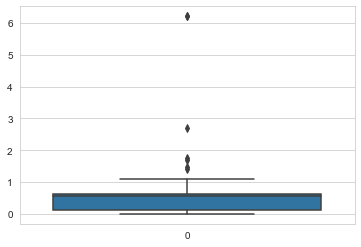

In [91]:
sns.boxplot(data = df['K'])

В этом показателе выбросы только после значения 2 буду удалять, хотя можно было бы попробовать удалить и  после 1.1 

<AxesSubplot:>

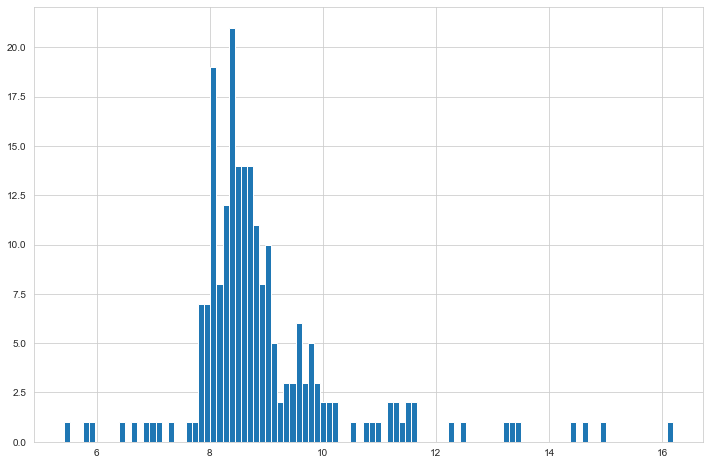

In [92]:
df['Ca'].hist(bins = 100, figsize = (12, 8))


<AxesSubplot:>

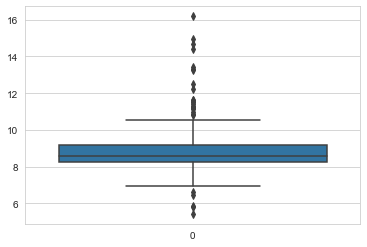

In [93]:
sns.boxplot(data = df['Ca'])

Тут  от 6 и после 12 выбросы удалю, остальные ближе к данным находятся и выглядит вполне причатсными)) 

<AxesSubplot:>

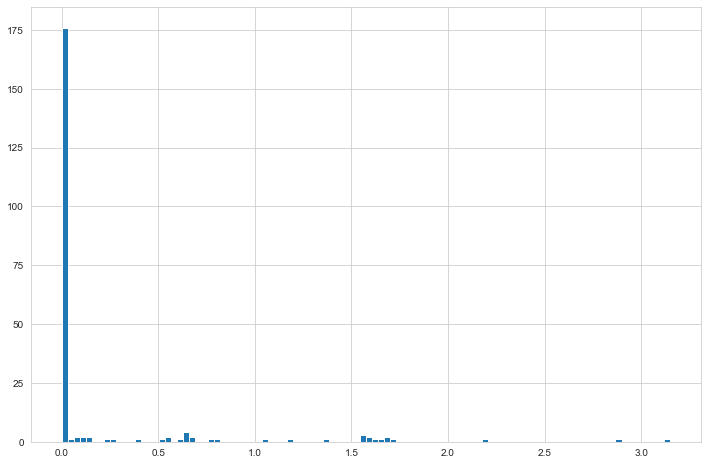

In [94]:
df['Ba'].hist(bins = 100, figsize = (12, 8))


<AxesSubplot:>

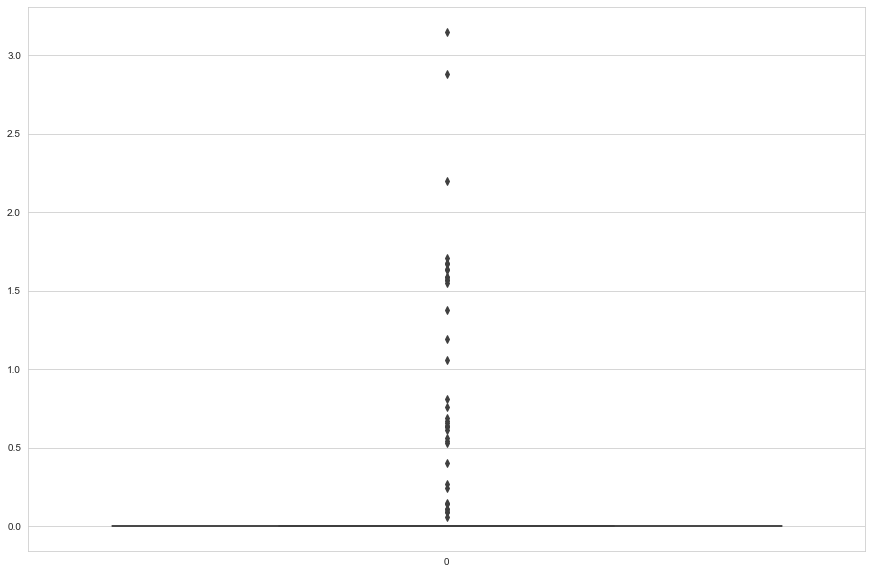

In [95]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df['Ba'])

В этом показателе все тоже не очень однозначно, очень много типов с показателем 0, но я все таки немного почищу, удалю выбросы более 2.0 

<AxesSubplot:>

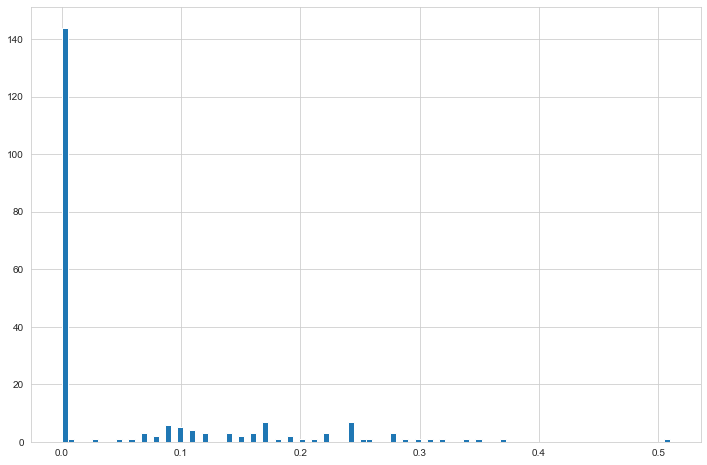

In [96]:
df['Fe'].hist(bins = 100, figsize = (12, 8))

<AxesSubplot:>

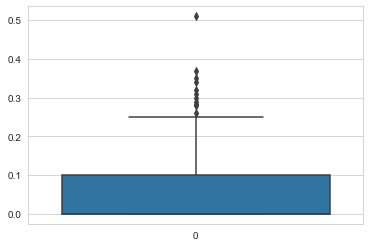

In [97]:
sns.boxplot(data = df['Fe'])

Тут удалю только один выброс превышающий значение 0.5

Далее заведу вторую переменную с нашим датасетом, что б в нем удалять выбросы, при этом, что б первоначальный дф сохранился. Будем с их помощью считать процент удаленных данных по каждому типу стекла

In [121]:
df1 = df

In [122]:
df1 = df1[df1.RI <= 1.525]
df1 = df1[df1.RI >= 1.514]
df1 = df1[df1.Na >= 12]
df1 = df1[df1.Na <= 15]
df1 = df1[df1.Al <= 3.0]
df1 = df1[df1.Al >= 0.5]
df1 = df1[df1.Si >= 71]
df1 = df1[df1.Si <= 74]
df1 = df1[df1.K <= 2]
df1 = df1[df1.Ca <= 12]
df1 = df1[df1.Ca >= 6]
df1 = df1[df1.Ba <= 2.0]
df1 = df1[df1.Fe <= 0.5]


In [115]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      182 non-null    float64
 1   Na      182 non-null    float64
 2   Mg      182 non-null    float64
 3   Al      182 non-null    float64
 4   Si      182 non-null    float64
 5   K       182 non-null    float64
 6   Ca      182 non-null    float64
 7   Ba      182 non-null    float64
 8   Fe      182 non-null    float64
 9   Type    182 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.6 KB


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [117]:
((df.groupby('Type').size() - df1.groupby('Type').size()) / len(df) )* 100


Type
1    2.336449
2    4.205607
3    0.000000
5    3.738318
6    0.934579
7    3.738318
dtype: float64

И осталось переобучить нашу модель на новом датасете

In [118]:
x1 = df1[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']]
y1 = df1['Type']

In [119]:
model1, y_pred1, score1 = learn_model(x = x1, y = y1)

Точность предсказания RandomForestClassifier(): 0.8918918918918919
Предказаннные типы стекла: [3 1 1 2 2 3 2 1 2 2 1 2 7 2 2 1 7 7 1 1 2 2 7 2 1 7 2 7 5 7 2 1 5 2 1 2 2]


Отлично! Точность с 0.69 выросла до 0.89, я считаю, что все очень успешно) 

### Вывод 

- Изначально на первичных данных была обучена модель рандомного леса, после чего просмотрела все данные, нашла выбросы, удалила самые явные(по-моему мнению) и на новом датафрейме переобучила модель, получив точность предсказания на 0.2 больше

- Точность первой модели 0.69, точность второй модели 0.89

- Данные не всегда попадают в руки чистми, точнее сказать, редко попадают к нам в руки чистыми, так что я считаю, что всегда нужно исследовать их на выбросы и на аномальные показатели. Всегда есть исключения из общей выборки, кто-то сильно выше остальных, кто-то сильно ниже, и, к примеру, если в эту выборку добавить еще 10 осыбей, то с высокой вероятностью их рост будет ближе к медианному, чем к нашим выбросам, но из-за выбросов эта медиана смещается и точность статистики с предсказаниями показывает плохой результат. 